In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set(style="white")
import matplotlib.pyplot as plt
import matplotlib as mpl

import sklearn
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score, confusion_matrix,precision_score, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score


from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.linear_model import LogisticRegression  



from sklearn import preprocessing
from IPython.display import display, HTML

%matplotlib inline

In [2]:
df=pd.read_csv('./data/churn.csv').drop(columns=['RowNumber','Surname', 'CustomerId', 'Geography'], axis=1)
df.head(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1


In [3]:
df['Gender']=df['Gender'].apply(lambda x: 0 if x=='Female' else 1)

In [4]:
y = df["Exited"]
X = df.drop(["Exited"], axis = 1)

In [5]:
X.head(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,42,2,0.00,1,1,1,101348.88
1,608,0,41,1,83807.86,1,0,1,112542.58
2,502,0,42,8,159660.80,3,1,0,113931.57


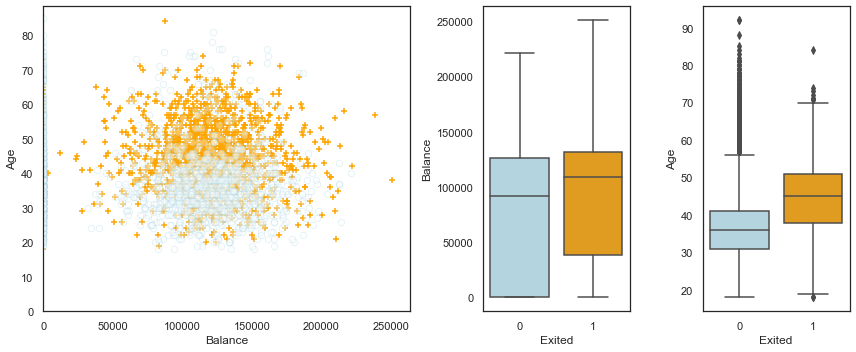

In [7]:
fig = plt.figure(figsize=(12,5))
gs = mpl.gridspec.GridSpec(1, 4)
ax1 = plt.subplot(gs[0,:-2])
ax2 = plt.subplot(gs[0,-2])
ax3 = plt.subplot(gs[0,-1])

# Take a fraction of the samples where target value (default) is 'no'
df_no = df[df.Exited == 0].sample(frac=0.25)
# Take all samples  where target value is 'yes'
df_yes = df[df.Exited == 1]
df_ = df_no.append(df_yes)

ax1.scatter(df_[df_.Exited == 1].Balance, df_[df_.Exited == 1].Age, s=40, c='orange', marker='+',
            linewidths=1)
ax1.scatter(df_[df_.Exited == 0].Balance, df_[df_.Exited == 0].Age, s=40, marker='o', linewidths='1',
            edgecolors='lightblue', facecolors='white', alpha=.3)

ax1.set_ylim(ymin=0)
ax1.set_ylabel('Age')
ax1.set_xlim(xmin=-100)
ax1.set_xlabel('Balance')

c_palette = {0:'lightblue', 1:'orange'}
sns.boxplot('Exited', 'Balance', data=df, orient='v', ax=ax2, palette=c_palette)
sns.boxplot('Exited', 'Age', data=df, orient='v', ax=ax3, palette=c_palette)
gs.tight_layout(plt.gcf())

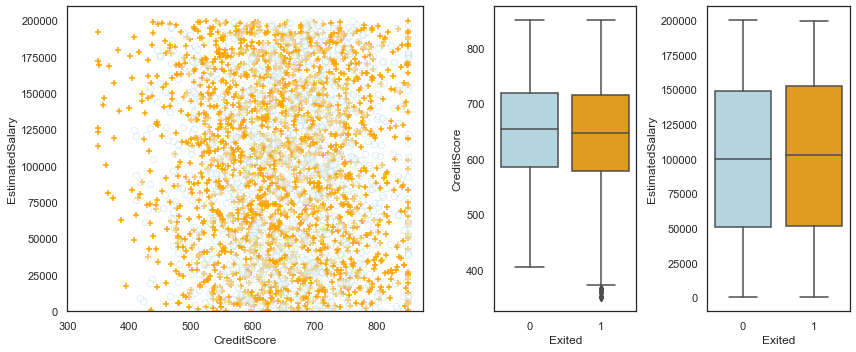

In [15]:
fig = plt.figure(figsize=(12,5))
gs = mpl.gridspec.GridSpec(1, 4)
ax1 = plt.subplot(gs[0,:-2])
ax2 = plt.subplot(gs[0,-2])
ax3 = plt.subplot(gs[0,-1])

# Take a fraction of the samples where target value (default) is 'no'
df_no = df[df.Exited == 0].sample(frac=0.15)
# Take all samples  where target value is 'yes'
df_yes = df[df.Exited == 1]
df_ = df_no.append(df_yes)

ax1.scatter(df_[df_.Exited == 1].CreditScore, df_[df_.Exited == 1].EstimatedSalary, s=40, c='orange', marker='+',
            linewidths=1)
ax1.scatter(df_[df_.Exited == 0].CreditScore, df_[df_.Exited == 0].EstimatedSalary, s=40, marker='o', linewidths='1',
            edgecolors='lightblue', facecolors='white', alpha=.4)

ax1.set_ylim(ymin=0)
ax1.set_ylabel('EstimatedSalary')
ax1.set_xlim(xmin=300)
ax1.set_xlabel('CreditScore')

c_palette = {0:'lightblue', 1:'orange'}
sns.boxplot('Exited', 'CreditScore', data=df, orient='v', ax=ax2, palette=c_palette)
sns.boxplot('Exited', 'EstimatedSalary', data=df, orient='v', ax=ax3, palette=c_palette)
gs.tight_layout(plt.gcf())

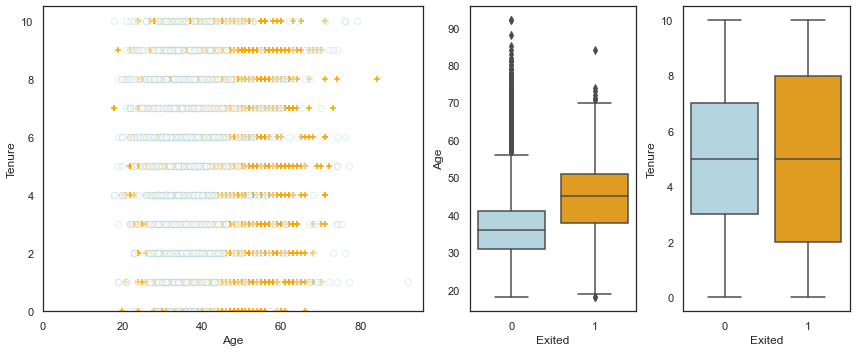

In [14]:
fig = plt.figure(figsize=(12,5))
gs = mpl.gridspec.GridSpec(1, 4)
ax1 = plt.subplot(gs[0,:-2])
ax2 = plt.subplot(gs[0,-2])
ax3 = plt.subplot(gs[0,-1])

# Take a fraction of the samples where target value (default) is 'no'
df_no = df[df.Exited == 0].sample(frac=0.15)
# Take all samples  where target value is 'yes'
df_yes = df[df.Exited == 1]
df_ = df_no.append(df_yes)

ax1.scatter(df_[df_.Exited == 1].Age, df_[df_.Exited == 1].Tenure, s=40, c='orange', marker='+',
            linewidths=1)
ax1.scatter(df_[df_.Exited == 0].Age, df_[df_.Exited == 0].Tenure, s=40, marker='o', linewidths='1',
            edgecolors='lightblue', facecolors='white', alpha=.4)

ax1.set_ylim(ymin=0)
ax1.set_ylabel('Tenure')
ax1.set_xlim(xmin=0)
ax1.set_xlabel('Age')

c_palette = {0:'lightblue', 1:'orange'}
sns.boxplot('Exited', 'Age', data=df, orient='v', ax=ax2, palette=c_palette)
sns.boxplot('Exited', 'Tenure', data=df, orient='v', ax=ax3, palette=c_palette)
gs.tight_layout(plt.gcf())

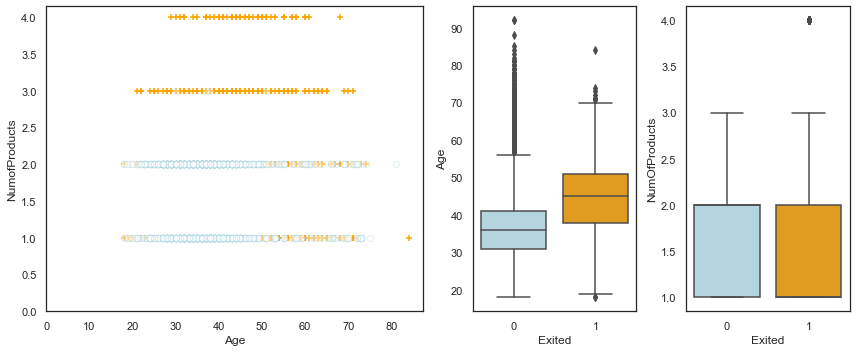

In [16]:
fig = plt.figure(figsize=(12,5))
gs = mpl.gridspec.GridSpec(1, 4)
ax1 = plt.subplot(gs[0,:-2])
ax2 = plt.subplot(gs[0,-2])
ax3 = plt.subplot(gs[0,-1])

# Take a fraction of the samples where target value (default) is 'no'
df_no = df[df.Exited == 0].sample(frac=0.15)
# Take all samples  where target value is 'yes'
df_yes = df[df.Exited == 1]
df_ = df_no.append(df_yes)

ax1.scatter(df_[df_.Exited == 1].Age, df_[df_.Exited == 1].NumOfProducts, s=40, c='orange', marker='+',
            linewidths=1)
ax1.scatter(df_[df_.Exited == 0].Age, df_[df_.Exited == 0].NumOfProducts, s=40, marker='o', linewidths='1',
            edgecolors='lightblue', facecolors='white', alpha=.4)

ax1.set_ylim(ymin=0)
ax1.set_ylabel('NumofProducts')
ax1.set_xlim(xmin=0)
ax1.set_xlabel('Age')

c_palette = {0:'lightblue', 1:'orange'}
sns.boxplot('Exited', 'Age', data=df, orient='v', ax=ax2, palette=c_palette)
sns.boxplot('Exited', 'NumOfProducts', data=df, orient='v', ax=ax3, palette=c_palette)
gs.tight_layout(plt.gcf())

In [24]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

from statsmodels.api import add_constant
from statsmodels.api import Logit
X_train = sm.add_constant(df[['Age', 'Balance','NumOfProducts','IsActiveMember','Tenure','CreditScore','EstimatedSalary']])
est = sm.Logit(y, X_train).fit()
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.440442
         Iterations 6


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-3.796487e+00,2.346296e-01,-16.180768,6.892939e-59,-4.256353e+00,-3.336622
Age,7.287531e-02,2.535504e-03,28.741943,1.142144e-181,6.790582e-02,0.077845
Balance,4.953836e-06,4.567895e-07,10.844900,2.108663e-27,4.058545e-06,0.000006
NumOfProducts,-2.310884e-02,4.617915e-02,-0.500417,6.167813e-01,-1.136183e-01,0.067401
IsActiveMember,-1.085043e+00,5.692661e-02,-19.060377,5.388561e-81,-1.196617e+00,-0.973469
Tenure,-1.638950e-02,9.223819e-03,-1.776867,7.559015e-02,-3.446785e-02,0.001689
CreditScore,-6.217932e-04,2.757521e-04,-2.254899,2.413967e-02,-1.162257e-03,-0.000081
EstimatedSalary,5.327338e-07,4.667147e-07,1.141455,2.536807e-01,-3.820102e-07,0.000001


Lets see how each parameter predict probability of churn. The parameters are assocciated with Churn have P-value less than 0.05, thus we could reject $$Ho=Bi==0$$  NumofProducts,Tenure, CreditScore and Estimated Salary do not correspond to probability of Churn.
---
Probability of churn can be written as Pr(churn=Yes|Age).We see that $$B1==0.07,$$ that indicates that increase in Age will increase probability of Churn.To be precise the 1 unit increase in Age is assocciated with an increase in log odds of churn by 0.07 units
---

In [31]:
cols=['Age', 'Balance','IsActiveMember']
X=X[cols]
y=y

In [32]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.33, random_state=42)

In [33]:
X_train, X_val, y_train, y_val=train_test_split(X_train, y_train, test_size=0.2, random_state=23)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.fit_transform(X_train)#fit_train set scaled
X_val=scaler.transform(X_val)#validation set scaled
X_test=scaler.transform(X_test)#holdout dataset scaled

In [35]:
# count examples in each class
from collections import Counter
counter = Counter(y_val)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)

Estimate: 3.605


In [39]:
#define model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance

print("Mean ROC AUC: %.5f " % (scores.mean()))

Mean ROC AUC: 0.74303 


In [44]:
param_grid= {'max_iter':[10,50,100,200,500], 'C':[0.1,0.4,1.0],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag'],'penalty':['l1','l2']}
model =LogisticRegression(class_weight='balanced')

In [45]:
# define evaluation procedure
from sklearn.model_selection import GridSearchCV
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X_train, y_train)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.749808 using {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


## Validation set

In [46]:
#Best: 0.749808 using {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
model= LogisticRegression(C=0.1, max_iter=100, class_weight='balanced',solver='liblinear',penalty='l1',random_state=15)
model.fit(X_train, y_train)
y_hat=model.predict(X_val)
lr_proba=model.predict_proba(X_val)
#lr_probs=lr_proba[:,1]

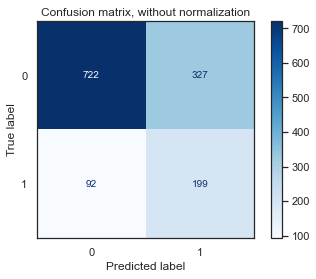

In [47]:
disp = plot_confusion_matrix(model, X_val, y_val,cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion matrix, without normalization")
plt.show()

**Total Error is 31.2%, percentage customers were missed =62%, Specificity(percentage of non_churn that are correctly identified)=60%, Sensitivity(percantage of true churn that identified)=37%**

In [81]:
decision_threshold=0.53
lr_probs=(lr_proba[:,1]>decision_threshold)

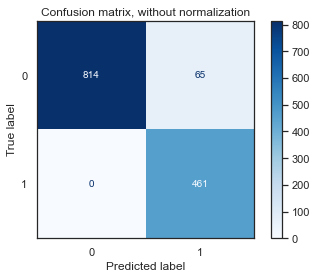

In [82]:
disp = plot_confusion_matrix(model, X_val, lr_probs,cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion matrix, without normalization")
plt.show()

**Total Error=0.4%, percentage of customers missed=12.3%, Specificity=92.0%, Sensitivity=87.6%**

In [83]:
lr_class_report=classification_report(y_val, lr_probs, digits=2)
print(lr_class_report)

              precision    recall  f1-score   support

           0       0.88      0.74      0.80      1049
           1       0.41      0.64      0.50       291

    accuracy                           0.72      1340
   macro avg       0.64      0.69      0.65      1340
weighted avg       0.78      0.72      0.74      1340



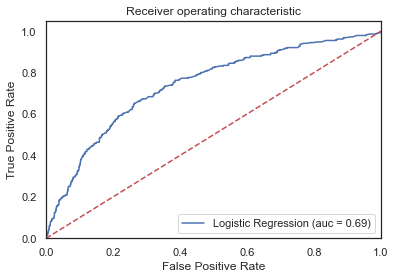

In [102]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_val, model.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val, model.predict_proba(X_val)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (auc = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Test set

In [98]:
model.fit(X_train, y_train)
y_hat=model.predict(X_test)
lr_proba=model.predict_proba(X_test)

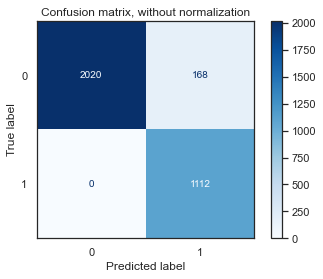

In [99]:
decision_threshold=0.53
lr_probs=(lr_proba[:,1]>decision_threshold)
disp = plot_confusion_matrix(model, X_test, lr_probs,cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion matrix, without normalization")
plt.show()

In [100]:
lr_class_report=classification_report(y_test, lr_probs, digits=2)
print(lr_class_report)

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      2657
           1       0.38      0.66      0.48       643

    accuracy                           0.73      3300
   macro avg       0.64      0.70      0.65      3300
weighted avg       0.80      0.73      0.75      3300



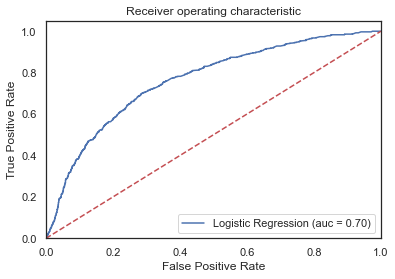

In [103]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (auc = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()